# Donor Choose : Naive Bayes

In [1]:
import os

os.chdir('E:\Datasets\DonorChoose')

In [2]:
import pandas as pd

donor = pd.read_csv('cleandonor4.csv')

donor.head(2)

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,project_title
0,Mrs.,IN,0,0,Literacy-Language,ESL Literacy,My students are English learners that are work...,154.6,23,PreK-Two,Educational Support for English Learners at Home
1,Mr.,FL,7,1,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,Six-Eight,Wanted: Projector for Hungry Learners


### Removing Stop Words from title

In [3]:
# We are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [4]:
from tqdm import tqdm
ftitle = [] 

for sen in tqdm( donor['project_title'].values ): 
    strY = " "

    for w in sen.lower().split():
        if w not in stopwords:
            strY = strY + w + " "

    ftitle.append( strY.strip() )

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 79387.47it/s]


In [5]:
donor.drop(['project_title'], axis=1, inplace=True)
donor['cleanTitle'] = ftitle

In [7]:
donor['cleanTitle'][6]

'chromebooks special education reading program'

In [8]:
from tqdm import tqdm
fessay = [] 

for sen in tqdm( donor['cleanEssay'].values ): 
    strY = " "

    for w in sen.lower().split():
        if w not in stopwords:
            strY = strY + w + " "

    fessay.append( strY.strip() )

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:57<00:00, 1907.36it/s]


In [9]:
donor.drop(['cleanEssay'], axis=1, inplace=True)
donor['cleanEssay'] = fessay

In [10]:
donor['cleanEssay'][8]

'students enthusiastic inquisitive learners k-6 title school. love learning, respond well learning new things. active learners enjoy freedoms, flexible seating arrangements use ipads instructional tools classroom. students variety interests - including sports, singing, dancing, art, gymnastics, playing indoor/outdoor games. school friendly atmosphere learners; evident moment enter building. teachers engaged high-interest lessons, one often find parents and/or volunteers assisting students throughout school. teachers constantly searching new inviting ways motivate learners.my second graders need extra activity time class time help stay focused. school recently received two new online programs--go noodle plus light sail--both supporting movement classrooms. students asked additional chromebooks use rotating small groups. one chromebook love share. programs, need laptops rotating groups. students say learning fun light, portable devices. enjoy responsibility taking care chromebook share. 

In [11]:
donor.head(2)

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,price,quantity,cleanProjectGradeCategory,cleanTitle,cleanEssay
0,Mrs.,IN,0,0,Literacy-Language,ESL Literacy,154.6,23,PreK-Two,educational support english learners home,students english learners working english seco...
1,Mr.,FL,7,1,History-Civics Health-Sports,Civics-Government TeamSports,299.0,1,Six-Eight,wanted: projector hungry learners,"students arrive school eager learn. polite, ge..."


In [12]:
donor.shape

(109248, 11)

In [13]:
nan = donor[ donor['teacher_prefix'].isnull() ]

nan

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,price,quantity,cleanProjectGradeCategory,cleanTitle,cleanEssay


In [14]:
donor[ donor['teacher_prefix'] == 'missing']

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,price,quantity,cleanProjectGradeCategory,cleanTitle,cleanEssay


In [15]:
donor = donor[0:50000]

In [16]:
Y = donor['project_is_approved']

len( Y )  # Y = label i.e; Project is approved ( 0 or 1 )

50000

In [17]:
donor.drop( 'project_is_approved', axis=1, inplace=True )

In [18]:
X = donor

In [19]:
X.head(2)

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategory,price,quantity,cleanProjectGradeCategory,cleanTitle,cleanEssay
0,Mrs.,IN,0,Literacy-Language,ESL Literacy,154.6,23,PreK-Two,educational support english learners home,students english learners working english seco...
1,Mr.,FL,7,History-Civics Health-Sports,Civics-Government TeamSports,299.0,1,Six-Eight,wanted: projector hungry learners,"students arrive school eager learn. polite, ge..."


## Splitting Data

In [20]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size = 0.33, stratify = Y) # Spliting into Test and Train

# stratify : we need to pass array containing class label as an argument to stratify

xtrain, xcv, ytrain, ycv = train_test_split( xtrain, ytrain, test_size = 0.33, stratify = ytrain )

In [21]:
print( xtrain.shape )
print( xcv.shape )
print( xtest.shape )

print( ytrain.shape )
print( ycv.shape )
print( ytest.shape )

(22445, 10)
(11055, 10)
(16500, 10)
(22445,)
(11055,)
(16500,)


## Creating Data Matrix 

### Essay BOW

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( min_df = 10, ngram_range=(1,4) )
# ngram_range : The lower and upper boundary of the range of n-values for different n-grams to be extracted.

vect.fit( xtrain['cleanEssay'].values )
# vect.fit( text ): Means that internally it is only learning the vocabulary of `Text` i.e. unique n-grams

# THE VOCABULARY SHOULD BUILT ONLY WITH THE WORDS OF TRAIN DATA

xtrEssayBOW = vect.transform( xtrain['cleanEssay'].values ) 
xcvEssayBOW = vect.transform( xcv['cleanEssay'].values ) 
xteEssayBOW = vect.transform( xtest['cleanEssay'].values )

In [23]:
print( xtrEssayBOW.shape )
print( xcvEssayBOW.shape )
print( xteEssayBOW.shape )

(22445, 65668)
(11055, 65668)
(16500, 65668)


### Essay TFIDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidfvect = TfidfVectorizer( min_df = 10 )

tfidfvect.fit( xtrain['cleanEssay'].values )

xtrEssayTFIDF = tfidfvect.transform( xtrain['cleanEssay'].values )
xcvEssayTFIDF = tfidfvect.transform( xcv['cleanEssay'].values )
xteEssayTFIDF = tfidfvect.transform( xtest['cleanEssay'].values )

print( xtrEssayTFIDF.shape )
print( xcvEssayTFIDF.shape )
print( xteEssayTFIDF.shape )

(22445, 8892)
(11055, 8892)
(16500, 8892)


### Project Title BOW

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectTF = CountVectorizer( min_df = 10, ngram_range = (1,4) )

vectTF.fit( xtrain['cleanTitle'].values )

xtrTitleBOW = vectTF.transform( xtrain['cleanTitle'].values )
xcvTitleBOW = vectTF.transform( xcv['cleanTitle'].values )
xteTitleBOW = vectTF.transform( xtest['cleanTitle'].values )

print( xtrTitleBOW.shape )
print( xcvTitleBOW.shape )
print( xteTitleBOW.shape )

(22445, 1737)
(11055, 1737)
(16500, 1737)


### Project Title TFIDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidfvectTF = TfidfVectorizer( min_df=10 )
tfidfvectTF.fit( xtrain['cleanTitle'].values )

xtrTitleTFIDF = tfidfvectTF.transform( xtrain['cleanTitle'].values )
xcvTitleTFIDF = tfidfvectTF.transform( xcv['cleanTitle'].values )
xteTitleTFIDF = tfidfvectTF.transform( xtest['cleanTitle'].values )

print( xtrTitleTFIDF.shape )
print( xcvTitleTFIDF.shape )
print( xteTitleTFIDF.shape )

(22445, 1194)
(11055, 1194)
(16500, 1194)


### State

In [27]:
vectState = CountVectorizer()

vectState.fit( xtrain['school_state'].values )

xtrState = vectState.transform( xtrain['school_state'].values )
xcvState = vectState.transform( xcv['school_state'].values )
xteState = vectState.transform( xtest['school_state'].values )

In [28]:
print( xtrState.shape )
print( xcvState.shape )
print( xteState.shape )

(22445, 51)
(11055, 51)
(16500, 51)


In [29]:
print( vectState.get_feature_names() )

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### Teacher Prefix

In [30]:
vectPrefix = CountVectorizer( vocabulary=['dr', 'mr', 'mrs', 'ms', 'teacher'] )

vectPrefix.fit( xtrain['teacher_prefix'].values  )

xtrPrefix = vectPrefix.transform( xtrain['teacher_prefix'].values )
xcvPrefix = vectPrefix.transform( xcv['teacher_prefix'].values )
xtePrefix = vectPrefix.transform( xtest['teacher_prefix'].values )

In [31]:
print( xtrPrefix.shape )
print( xcvPrefix.shape )
print( xtePrefix.shape )

(22445, 5)
(11055, 5)
(16500, 5)


In [32]:
print( vectPrefix.get_feature_names() )

['dr', 'mr', 'mrs', 'ms', 'teacher']


### Category

In [33]:
vectCat = CountVectorizer()

vectCat.fit( xtrain['clean_categories'].values )

xtrCat = vectCat.transform( xtrain['clean_categories'].values )
xcvCat = vectCat.transform( xcv['clean_categories'].values )
xteCat = vectCat.transform( xtest['clean_categories'].values )

print( xtrCat.shape )
print( xcvCat.shape )
print( xteCat.shape )

(22445, 15)
(11055, 15)
(16500, 15)


### Sub Category

In [34]:
vectSubCat = CountVectorizer()

vectSubCat.fit( xtrain['clean_subcategory'].values )

xtrSubCat = vectSubCat.transform( xtrain['clean_subcategory'].values )
xcvSubCat = vectSubCat.transform( xcv['clean_subcategory'].values )
xteSubCat = vectSubCat.transform( xtest['clean_subcategory'].values )

print( xtrSubCat.shape )
print( xcvSubCat.shape )
print( xteSubCat.shape )

(22445, 37)
(11055, 37)
(16500, 37)


### Project Grade Category

In [35]:
vectGCat = CountVectorizer()

vectGCat.fit( xtrain['cleanProjectGradeCategory'].values )

xtrGCat = vectGCat.transform( xtrain['cleanProjectGradeCategory'].values )
xcvGCat = vectGCat.transform( xcv['cleanProjectGradeCategory'].values )
xteGCat = vectGCat.transform( xtest['cleanProjectGradeCategory'].values )

print( xtrGCat.shape )
print( xcvGCat.shape )
print( xteGCat.shape )

(22445, 8)
(11055, 8)
(16500, 8)


### Price

In [36]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['price'].values.reshape(-1,1) )

xtrPrice = norm.transform( xtrain['price'].values.reshape(-1,1) )
xcvPrice = norm.transform( xcv['price'].values.reshape(-1,1) )
xtePrice = norm.transform( xtest['price'].values.reshape(-1,1) )

In [37]:
print( xtrPrice.shape )
print( xcvPrice.shape )
print( xtePrice.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Previously Posted projects

In [38]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

xtrPrev = norm.transform( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xcvPrev = norm.transform( xcv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xtePrev = norm.transform( xtest['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

print( xtrPrev.shape )
print( xcvPrev.shape )
print( xtePrev.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Quantity

In [39]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['quantity'].values.reshape(-1,1) )

xtrQuan = norm.transform( xtrain['quantity'].values.reshape(-1,1) )
xcvQuan = norm.transform( xcv['quantity'].values.reshape(-1,1) )
xteQuan = norm.transform( xtest['quantity'].values.reshape(-1,1) )

print( xtrPrev.shape )
print( xcvPrev.shape )
print( xtePrev.shape )

(22445, 1)
(11055, 1)
(16500, 1)


## Merging Features

### Set 1

In [40]:
from scipy.sparse import hstack

xtr1 = hstack(( xtrEssayBOW, xtrTitleBOW, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv1 = hstack(( xcvEssayBOW, xcvTitleBOW, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte1 = hstack(( xteEssayBOW, xteTitleBOW, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr1.shape, ytrain.shape )
print( xcv1.shape, ycv.shape )
print( xte1.shape, ytest.shape )

(22445, 67524) (22445,)
(11055, 67524) (11055,)
(16500, 67524) (16500,)


### Set 2

In [41]:
from scipy.sparse import hstack

xtr2 = hstack(( xtrEssayTFIDF, xtrTitleTFIDF, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv2 = hstack(( xcvEssayTFIDF, xcvTitleTFIDF, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte2 = hstack(( xteEssayTFIDF, xteTitleTFIDF, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr2.shape, ytrain.shape )
print( xcv2.shape, ycv.shape )
print( xte2.shape, ytest.shape )

(22445, 10205) (22445,)
(11055, 10205) (11055,)
(16500, 10205) (16500,)


In [42]:
import numpy as np
a = 10**-1
print( np.round(a,5) )

0.1


In [43]:
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

## Functions for Code Resuability

### Function to plot Errors

In [44]:
def batchPredict( data, classifier ): # Predict the probablity of data points in batch i.e; some data points at once 
    
    yPred = []
    
    loop = data.shape[0] - data.shape[0] % 1000   # data.shape[0] : no of rows in data matrix
    # for ex data shape = 4489 then loop = 4489 - 4489%1000 = 4489 - 489 = 4000 
    # Now we can divide our loop into 4 interval of 1000s and one remaining 489
    # ie; 1-1000 in 1st iteration 1000-2000 in 2nd iteration 2000-3000 in 3rd 3000-4000 in 4th and 4000-4489 in the last iteraion
    
    for i in range( 0, loop, 1000 ):
        # If loop = 4000 Computes proba for 0 - 4000 in 4 iterations
       
        yPred.extend( classifier.predict_proba( data[i : i+1000] )[ :, 1] ) # [ :, 1] : All row Only 1 col
        # predict_proba : Return probability estimates for the test data X.

    yPred.extend( classifier.predict_proba( data[ loop : ] )[ :, 1 ] )
    # computes probab for remaining points

    return yPred

In [45]:
from sklearn.metrics import roc_auc_score

def NB( xtr, xcv, ytr, ycv ):

    trAUC = []
    cvAUC = []
    
    a = [ 10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 100 ] 
    
    print(' '*4,'- First -', ' '*4,'- Second -', ' '*4,'- Third -', ' '*4,'- Fourth -', ' '*4,'- Fifth -', ' '*4,'- Sixth -'
         , ' '*4,'- Seven -', ' '*4,'- Eight -')


    for i in a:

        naive = MultinomialNB( alpha = i )
        naive.fit(xtr, ytr)

        ytrPred = batchPredict( xtr, naive )    
        ycvPred = batchPredict( xcv, naive )

        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
        # not the predicted outputs 

        trAUC.append( roc_auc_score( ytrain, ytrPred ))
        cvAUC.append( roc_auc_score( ycv, ycvPred ))

        print('#'*14, end ='  ' )

    plt.figure( figsize = ( 15, 5 ) )

    plt.plot( np.log(a), trAUC, label = 'Train AUC')
    plt.plot( np.log(a), cvAUC, label = 'CV AUC')

    plt.scatter( np.log(a), trAUC, label = 'Train AUC points')
    plt.scatter( np.log(a), cvAUC, label = 'CV AUC points')

    plt.legend()
    plt.xlabel("alpha: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

In [46]:
import numpy as np
import seaborn as sns

### Function to calculate and plot Confusion matrix

In [47]:
def predictCM( probab, threshold, fpr, tpr ):
    
    t = threshold[ np.argmax( fpr*( 1 - tpr ) ) ]  # returns the threshold val for the point with max fpr(1-tpr) value
    # fpr*( 1 - tpr ) will be high if fpr is high and tpr is low, argmax : Returns the indices of the maximum val along an axis
    
    print(" The maximum value of tpr*(1-fpr) = ", max( tpr*(1-fpr) ), " for threshold = ", np.round(t,3))
    
    pred = []
    for i in probab: # i = Probaility for all data points
        if i >= t:   #  if Probablity of a point is >= the Threshold value i,e; Threshold at index of max val of fpr(1-tpr) 
            pred.append(1)
        else:
            pred.append(0)
            
    return pred

In [48]:
from sklearn.metrics import confusion_matrix

def cm( ytr, yte, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno ):
   
    print("Confusion Matrix for Train of Set ", sno)
    
    predicted = predictCM( yTrainPred, trThreshold, trFPR, trTPR )
    cmtr = confusion_matrix( ytr, predicted )
    print( cmtr  )

    plt.figure( figsize = (8,6) )
    sns.set( font_scale = 1.4 ) #for label size
    sns.heatmap( cmtr,fmt=".1f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
    plt.show()
    plt.close()



    print("\n\nConfusion Matrix for Test 1 ")
    predicted = predictCM( yTestPred, teThreshold, teFPR, teTPR )

    cmte = confusion_matrix( yte, predicted )
    print( cmte )

    plt.figure( figsize = (8,6) )
    sns.set( font_scale = 1.4 ) #for label size
    sns.heatmap( cmte, fmt=".1f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
    plt.show()
    plt.close()

### Function to plot roc and calculating AUC

In [49]:
from sklearn.metrics import roc_curve, auc

def roc( xtr, ytr, xte, bestA, sno  ):
    
    naive = MultinomialNB( alpha = bestA )
    naive.fit( xtr, ytr )

    yTrainPred = batchPredict( xtr, naive )

    yTestPred = batchPredict( xte, naive )

    trFPR, trTPR, trThreshold = roc_curve( ytrain, yTrainPred ) # ytrain and YTrainPred must have same no. of points
    teFPR, teTPR, teThreshold = roc_curve(ytest, yTestPred )

    # roc_curve() : Compute Receiver operating characteristic (ROC),
    # this implementation is restricted to the binary classification task.
    # roc_curve( yTrue, yScore ) : yTrue = True Binary labels, yScore = Target values Probablistic estimate, confidence values etc
    # The func returns 3 arrays : fpr = false Positive rates, tpr = True Positive rates, Threshold 

    plt.figure( figsize = (15, 5) )
    plt.plot( trFPR, trTPR, label="Train AUC = " + str( auc( trFPR, trTPR ) ) )
    plt.plot( teFPR, teTPR, label="Test AUC = " + str( auc( teFPR, teTPR ) ) )

    plt.legend()
    plt.xlabel("A: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()
    
    cm( ytr, ytest, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno )

# Opeartions on Set 1

     - First -      - Second -      - Third -      - Fourth -      - Fifth -      - Sixth -      - Seven -      - Eight -
##############  ##############  ##############  ##############  ##############  ##############  ##############  ##############  

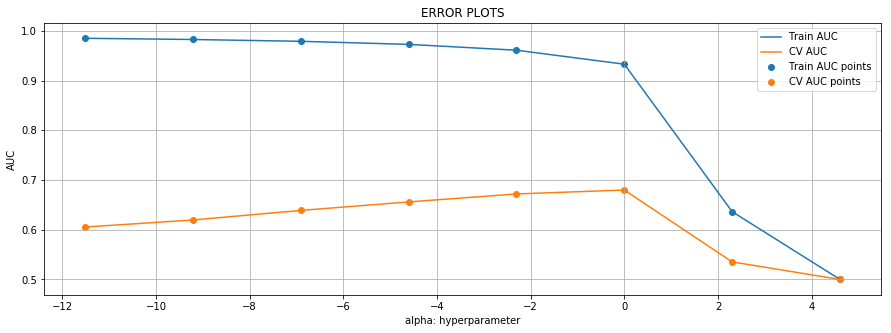

In [50]:
NB( xtr1, xcv1, ytrain, ycv )

# [ 10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 100 ]

In [51]:
# Getting all the features of BOW ( i.e; Set 1 )

feat = [] 

feat.extend( vect.get_feature_names() ) 
feat.extend( vectTF.get_feature_names() ) 
feat.extend( vectState.get_feature_names() )
feat.extend( vectPrefix.get_feature_names() )
feat.extend( vectCat.get_feature_names() )
feat.extend( vectSubCat.get_feature_names() )
feat.extend( vectGCat.get_feature_names() )
feat.append('Price')
feat.append('Previously Posted Projects')
feat.append('Quantity')

len(feat)

67524

In [52]:
bestA = 1

naive = MultinomialNB( alpha = bestA )

naive.fit( xtr1, ytrain )

NegProb = naive.feature_log_prob_[0, :].argsort() # Class 0 all Features
# argsort() will sort indices from low probability to high probability
# So we need to reverse our indicies list
NegProb = NegProb[::-1]
print( NegProb[:10] )

# feature_log_prob_ : Empirical log probability of features given a class, P(x_i|y).
# array, shape (n_classes, n_features)

[52355 46740 30152  9371 29295 24322 67523 67521 36739 34052]


In [53]:
print(' Top 10 -ve class ( 0 ) features')
c = 0
for i in NegProb[:10]:
    c +=1
    print(c,'. ',feat[i])

 Top 10 -ve class ( 0 ) features
1 .  students
2 .  school
3 .  learning
4 .  classroom
5 .  learn
6 .  help
7 .  Quantity
8 .  Price
9 .  nannan
10 .  many


In [54]:
PosProb = naive.feature_log_prob_[1, :].argsort() # Class 0 all Features

PosProb = PosProb[::-1]
print( PosProb[:10])

# feature_log_prob_ : Empirical log probability of features given a class, P(x_i|y).
# array, shape (n_classes, n_features)

[52355 46740 30152  9371 29295 24322 67523 67521 34052 36739]


In [55]:
print(' Top 10 +ve class ( 1 ) features')
c = 0
for i in PosProb[0:10]:
    c +=1
    print(c,'. ',feat[i])

 Top 10 +ve class ( 1 ) features
1 .  students
2 .  school
3 .  learning
4 .  classroom
5 .  learn
6 .  help
7 .  Quantity
8 .  Price
9 .  many
10 .  nannan


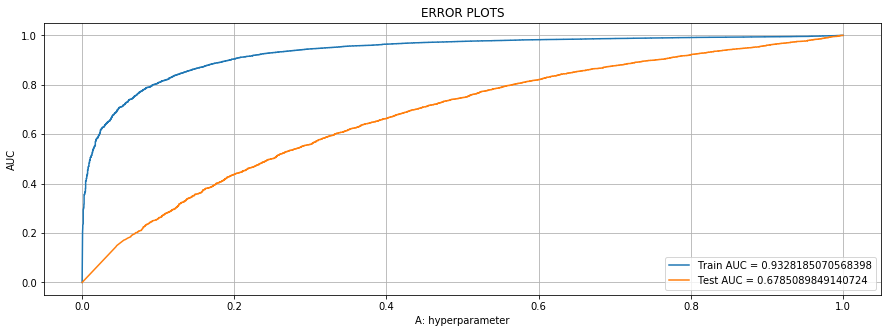

Confusion Matrix for Train of Set  1
 The maximum value of tpr*(1-fpr) =  0.7373290525276268  for threshold =  0.769
[[ 2916   547]
 [ 2437 16545]]


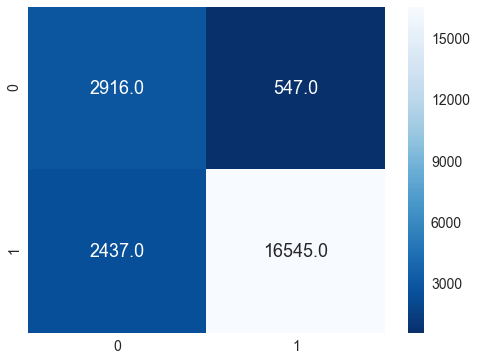



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.403284903905448  for threshold =  1.0
[[1526 1020]
 [4697 9257]]


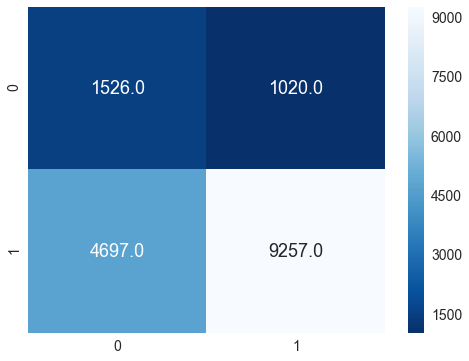

In [56]:
roc( xtr1, ytrain, xte1, bestA, 1 )

In [57]:
sns.set_style('whitegrid')

## Opeartions on set 2

     - First -      - Second -      - Third -      - Fourth -      - Fifth -      - Sixth -      - Seven -      - Eight -
##############  ##############  ##############  ##############  ##############  ##############  ##############  ##############  

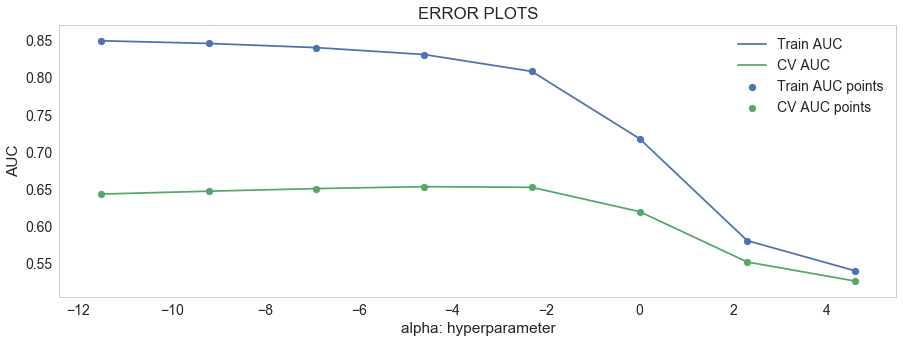

In [58]:
NB( xtr2, xcv2, ytrain, ycv )

# NB( xtr1, xcv1, ytrain, ycv )

In [59]:
# Getting all the features of TFIDF ( i.e; Set 2 )

feat = [] 

feat.extend( tfidfvect.get_feature_names() ) 
feat.extend( tfidfvectTF.get_feature_names() ) 
feat.extend( vectState.get_feature_names() )
feat.extend( vectPrefix.get_feature_names() )
feat.extend( vectCat.get_feature_names() )
feat.extend( vectSubCat.get_feature_names() )
feat.extend( vectGCat.get_feature_names() )
feat.append('Price')
feat.append('Previously Posted Projects')
feat.append('Quantity')

len(feat)

10205

In [60]:
bestA = 0.1

naive = MultinomialNB( alpha = bestA )

naive.fit( xtr2, ytrain )

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [61]:
NegProb = naive.feature_log_prob_[0, :].argsort() # Class 0 all Features
NegProb = NegProb[::-1]
print( NegProb[0:10] )
# feature_log_prob_ : Empirical log probability of features given a class, P(x_i|y).
# array, shape (n_classes, n_features)

print('\n Top 10 -ve class ( 0 ) features')
c = 0
for i in NegProb[:10]:
    c = c + 1
    print(c,'. : ',feat[i])

[10204 10202 10203 10139 10149 10150 10201 10197 10151 10153]

 Top 10 -ve class ( 0 ) features
1 . :  Quantity
2 . :  Price
3 . :  Previously Posted Projects
4 . :  mrs
5 . :  language
6 . :  literacy
7 . :  two
8 . :  prek
9 . :  math
10 . :  science


In [62]:
PosProb = naive.feature_log_prob_[1, :].argsort() # Class 0 all Features
PosProb = PosProb[::-1]

print( PosProb[:10])
# feature_log_prob_ : Empirical log probability of features given a class, P(x_i|y).
# array, shape (n_classes, n_features)

print('\n Top 10 +ve class ( 1 ) features')
c = 0
for i in PosProb[:10]:
    c +=1
    print(c,'. ',feat[i])

[10204 10202 10203 10139 10149 10150 10201 10197 10151 10153]

 Top 10 +ve class ( 1 ) features
1 .  Quantity
2 .  Price
3 .  Previously Posted Projects
4 .  mrs
5 .  language
6 .  literacy
7 .  two
8 .  prek
9 .  math
10 .  science


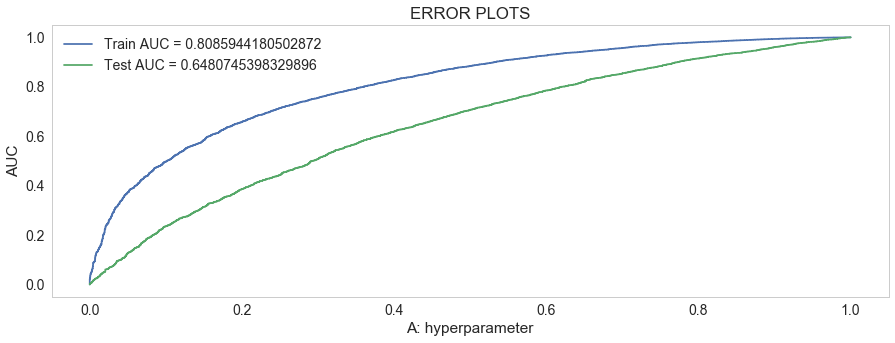

Confusion Matrix for Train of Set  2
 The maximum value of tpr*(1-fpr) =  0.5357421455522418  for threshold =  0.831
[[ 2429  1034]
 [ 4692 14290]]


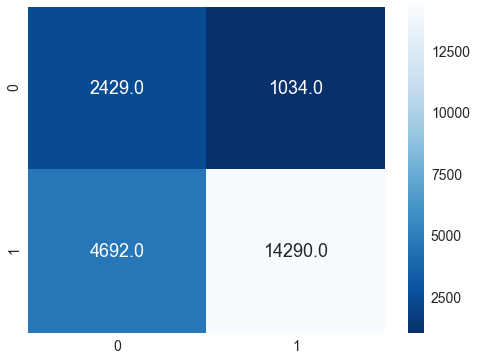



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.3736525837728972  for threshold =  0.865
[[1468 1078]
 [5073 8881]]


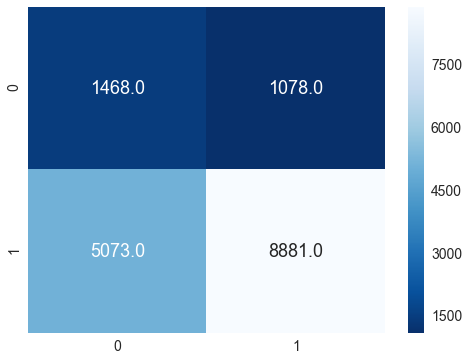

In [63]:
roc( xtr2, ytrain, xte2, bestA, 2 )

## Conclusions

In [64]:
from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = [" Vectorizer ", " Best alpha ", " Train AUC ", " Test AUC "]

x.add_row( [ " B.O.W ", " 1 ", " 0.9328 ", " 0.6725 " ] ) 
x.add_row( [ " TFIDF ", " 0.1 ", " 0.8085 ", " 0.6480 " ] )

print( x )

# Ref : http://zetcode.com/python/prettytable/

+--------------+--------------+-------------+------------+
|  Vectorizer  |  Best alpha  |  Train AUC  |  Test AUC  |
+--------------+--------------+-------------+------------+
|    B.O.W     |      1       |    0.9328   |   0.6725   |
|    TFIDF     |     0.1      |    0.8085   |   0.6480   |
+--------------+--------------+-------------+------------+


B.O.W vectorizer gives the highest Train AUC

B.O.W vectorizer gives the highest Test AUC